image number prediction using mnist dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import mnist

In [16]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train[0].shape

(28, 28)

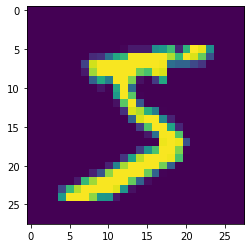

In [19]:
plt.imshow(x_train[0])

In [22]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_e = to_categorical(y_train)

In [24]:
y_e.shape

(60000, 10)

In [25]:
y_e[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
y_categorical_train = to_categorical(y_train,num_classes=10)
y_categorical_test = to_categorical(y_test,num_classes=10)

In [31]:
one = x_train[0]
print(one.max())
print(one.min())

255
0


In [32]:
x_train = x_train/255
x_test = x_test/255

In [34]:
scaled = x_train[0]
scaled

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
scaled.max()

1.0

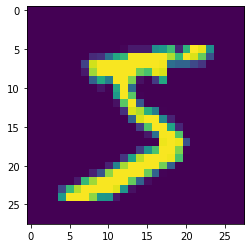

In [38]:
plt.imshow(scaled)

RESHAPE THE DATA

In [39]:
# batch size , width,height,color channels
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D , Dense,Flatten,Dropout
model = Sequential()
model.add(Conv2D(filters=32,kernel_size =(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

In [57]:
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(60,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',metrics=['accuracy'],loss = 'categorical_crossentropy')

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 150)               691350    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 60)                9060      
                                                      

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss',patience=1)
model.fit(x_train,y_categorical_train,epochs=20,validation_data=(x_test,y_categorical_test),callbacks=[earlystop])

Epoch 1/20
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1864 - accuracy: 0.9432 - val_loss: 0.0577 - val_accuracy: 0.9807
Epoch 2/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0694 - accuracy: 0.9785 - val_loss: 0.0398 - val_accuracy: 0.9861
Epoch 3/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0415 - val_accuracy: 0.9877


In [60]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

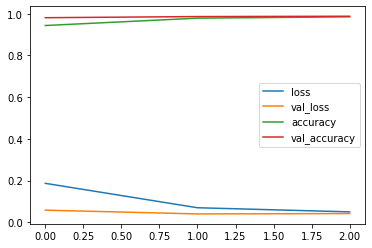

In [68]:
metrics[['loss','val_loss','accuracy','val_accuracy']].plot()

In [69]:
model.metrics_names

['loss', 'accuracy']

In [70]:
model.evaluate(x_train,y_categorical_train)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0198 - accuracy: 0.9941


[0.019816527143120766, 0.9940500259399414]

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [99]:
# predictions = model.predict(x_test)
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [100]:
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [86]:
y_categorical_test.shape

(10000, 10)

In [92]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [101]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [103]:
confusion_matrix(y_test,y_predict)

array([[ 977,    0,    0,    0,    0,    1,    0,    1,    1,    0],
       [   0, 1130,    2,    1,    0,    0,    1,    1,    0,    0],
       [   1,    0, 1021,    0,    0,    0,    0,    5,    5,    0],
       [   0,    0,    4,  997,    0,    4,    0,    2,    2,    1],
       [   0,    0,    0,    0,  968,    0,    5,    1,    1,    7],
       [   2,    0,    0,    6,    0,  879,    4,    0,    0,    1],
       [   7,    2,    0,    0,    1,    2,  945,    0,    1,    0],
       [   0,    1,    7,    0,    0,    0,    0, 1018,    2,    0],
       [   5,    0,    2,    1,    0,    1,    1,    1,  960,    3],
       [   3,    2,    0,    2,    5,    4,    0,    6,    5,  982]])

In [102]:
import seaborn as sns

<AxesSubplot:>

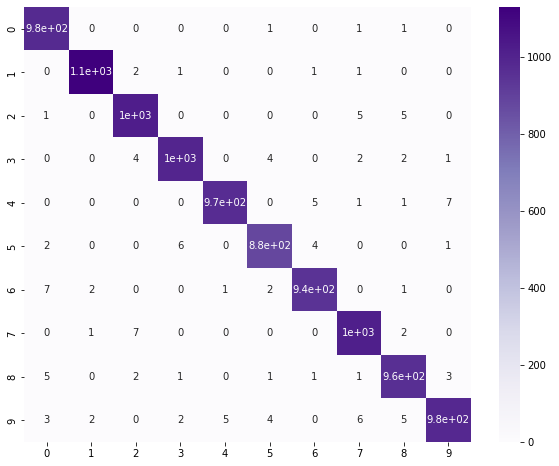

In [111]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Purples')

In [137]:
test = x_test[5]

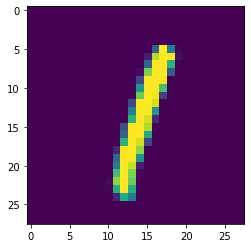

In [138]:
plt.imshow(test)

In [139]:
p= model.predict(test.reshape(1,28,28,1))

1/1 [==============================] - 0s 23ms/step


In [140]:
p=np.argmax(p)

predictioned value

In [141]:
p

1

In [142]:
model.save('number_mnist.h5')